Анастасия Плавина

## Тема: Классификация с помощью KNN. Кластеризация K-means

__Задание 1__. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

__Задание 2__. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

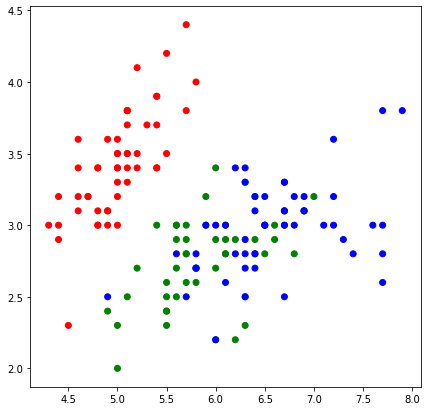

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [6]:
def get_index_weight(i, d, k):
    return (k+1-i)/k

def get_distance_weight(i, d, k):
    return 1/(d+0.2)**0.5

In [7]:
def knn(x_train, y_train, x_test, k, weight_calc):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}

        # Сортируем список и для первых k элементов добавляем веса
        test_distances = sorted(test_distances)
        for i in range(k):
            d = test_distances[i][0]
            classes[test_distances[i][1]] += weight_calc(i, d, k)
           
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [8]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [9]:
def get_graph(X_train, y_train, k, weight_calc):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, weight_calc)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

Оценка качества алгоритма при k = 10 с весами по индексу соседа
Accuracy = 0.867


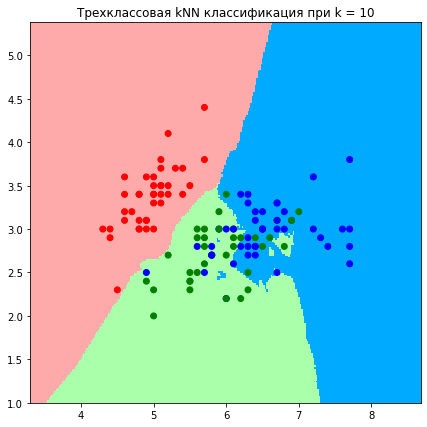

In [10]:
k = 10
print(f'Оценка качества алгоритма при k = {k} с весами по индексу соседа')
y_pred_1 = knn(X_train, y_train, X_test, k, get_index_weight)
print(f'Accuracy = {accuracy(y_pred_1, y_test):.3f}')
get_graph(X_train, y_train, k, get_index_weight)

Оценка качества алгоритма при k = 10 с весами по расстоянию до соседа
Accuracy = 0.867


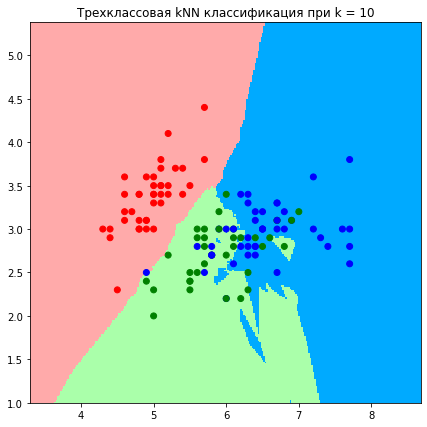

In [11]:
print(f'Оценка качества алгоритма при k = {k} с весами по расстоянию до соседа')
y_pred_2 = knn(X_train, y_train, X_test, k, get_distance_weight)
print(f'Accuracy = {accuracy(y_pred_2, y_test):.3f}')
get_graph(X_train, y_train, k, get_distance_weight)

__Выводы:__ При одинаковой точности предсказания разделяющая гиперплоскость при взвешивании по номеру соседа более цельная и точная.

__Задание 3__. Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

In [12]:
k_list = range(1, 11)
accuracies1 = []
accuracies2 = []

Max accuracy index weights: 0.867
Max accuracy distance weights:  0.867


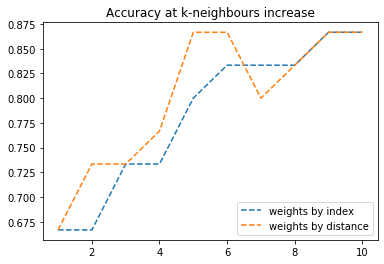

In [13]:
for k in k_list:
    y_pred_1 = knn(X_train, y_train, X_test, k, get_index_weight)
    accuracies1.append(accuracy(y_pred_1, y_test))
    
    y_pred_2 = knn(X_train, y_train, X_test, k, get_distance_weight)
    accuracies2.append(accuracy(y_pred_2, y_test))

print(f'Max accuracy index weights: {max(accuracies1):.3f}')
print(f'Max accuracy distance weights:  {max(accuracies2):.3f}')
plt.plot(k_list, accuracies1, linestyle='dashed', label='weights by index')
plt.plot(k_list, accuracies2, linestyle='dashed', label='weights by distance')
plt.title('Accuracy at k-neighbours increase')
plt.legend(loc='lower right')
plt.show()


__Выводы:__ Взвешивание по расстоянию до соседа дает наибольшую точность предсказания класса при учете 5 соседей, добавление весов по номеру соседа дает ту же точность только при учете 9 соседей.

__Задание 4*__. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке)

In [14]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

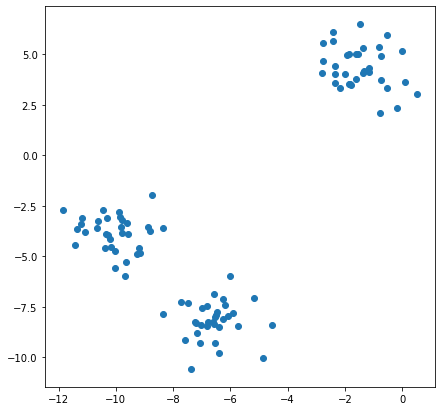

In [15]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [16]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [17]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [18]:
def eval_cluster_num(clusters, centroids):
    avg_dist = 0
    n = sum(map(lambda entry: len(clusters[entry]), clusters))

    for class_id in clusters:
        for x in clusters[class_id]:
            avg_dist += e_metrics(x, centroids[class_id])**2

    avg_dist /= n
    
    return avg_dist

In [19]:
# определим максимальное количество итераций
max_iterations = 10

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

k_list = range(1, 15)
avg_distances = []

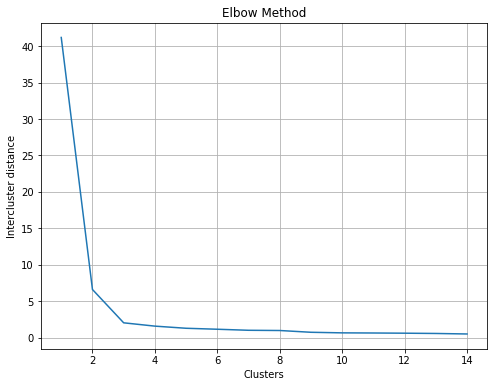

In [20]:
for k in k_list:
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    avg_dist = eval_cluster_num(clusters, centroids)
    avg_distances.append(avg_dist)

plt.figure(figsize=(8, 6))
plt.plot(list(k_list), avg_distances)   
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Intercluster distance')
plt.grid()
plt.show()

__Выводы:__ Оптимальное количество кластеров для данного датасета - 3.